# Import Data Walmart

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [96]:
# Load the dataset
walmart_data = pd.read_excel('walmart Retail Data 1.xlsx')

In [97]:
walmart_data.isnull().sum()

City                    0
Customer Age            0
Customer Name           0
Customer Segment        0
Discount                0
Number of Records       0
Order Date              0
Order ID                0
Order Priority          0
Order Quantity          0
Product Base Margin     0
Product Category        0
Product Container       0
Product Name            0
Product Sub-Category    0
Profit                  0
Region                  0
Row ID                  0
Sales                   0
Ship Date               0
Ship Mode               0
Shipping Cost           0
State                   0
Unit Price              0
Zip Code                0
dtype: int64

In [98]:
walmart_data.describe()

,Customer Age,Discount,Number of Records,Order ID,Order Quantity,Product Base Margin,Profit,Row ID,Sales,Shipping Cost,Unit Price,Zip Code
count,8399.000000,8399.000000,8399.0,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,54.591975,0.049671,1.0,29965.179783,25.571735,0.512494,181.184422,4200.000000,1775.878179,12.838557,89.346259,52839.139421
std,8.994208,0.031823,0.0,17260.883447,14.481071,0.135080,1196.653326,2424.726789,3585.050525,17.264052,290.354383,28509.535635
min,41.000000,0.000000,1.0,3.000000,1.000000,0.350000,-14140.701600,1.000000,2.240000,0.490000,0.990000,1001.000000
25%,47.000000,0.020000,1.0,15011.500000,13.000000,0.380000,-83.315000,2100.500000,143.195000,3.300000,6.480000,30337.000000
50%,55.000000,0.050000,1.0,29857.000000,26.000000,0.520000,-1.500000,4200.000000,449.420000,6.070000,20.990000,52732.000000
75%,60.000000,0.080000,1.0,44596.000000,38.000000,0.590000,162.748000,6299.500000,1709.320000,13.990000,85.990000,77577.000000
max,95.000000,0.250000,1.0,59973.000000,50.000000,0.850000,27220.690000,8399.000000,89061.050000,164.730000,6783.020000,99362.000000


In [99]:
# convert Order Date column to datetime
walmart_data['Order Date'] = pd.to_datetime(walmart_data['Order Date'])

# create new columns for year and month
walmart_data['Year'] = walmart_data['Order Date'].dt.year
walmart_data['Month'] = walmart_data['Order Date'].dt.month

# fill missing values in Customer Age column with the median age
walmart_data['Customer Age'].fillna(walmart_data['Customer Age'].median(), inplace=True)

# fill missing values in Product Base Margin column with the median margin
walmart_data['Product Base Margin'].fillna(walmart_data['Product Base Margin'].median(), inplace=True)

# convert Discount column to decimal format
#walmart_data['Discount'] = walmart_data['Discount'].apply(lambda x: x/100)

# create a new column for total cost
walmart_data['Total Cost'] = walmart_data['Sales'] * (1 - walmart_data['Discount']) - walmart_data['Profit']

# create a new column for profit margin
walmart_data['Profit Margin'] = walmart_data['Profit'] / walmart_data['Sales']

# convert Order Date and Ship Date columns to datetime data type
walmart_data['Order Date'] = pd.to_datetime(walmart_data['Order Date'])
walmart_data['Ship Date'] = pd.to_datetime(walmart_data['Ship Date'])

# convert Discount, Profit, Sales, Shipping Cost, Unit Price and Product Base Margin columns to float data type
walmart_data['Discount'] = walmart_data['Discount'].astype(float)
walmart_data['Profit'] = walmart_data['Profit'].astype(float)
walmart_data['Sales'] = walmart_data['Sales'].astype(float)
walmart_data['Shipping Cost'] = walmart_data['Shipping Cost'].astype(float)
walmart_data['Unit Price'] = walmart_data['Unit Price'].astype(float)
walmart_data['Product Base Margin'] = walmart_data['Product Base Margin'].astype(float)

# convert Customer Age, Number of Records, Order ID, Order Quantity, Row ID, and Zip Code columns to integer data type
walmart_data['Customer Age'] = walmart_data['Customer Age'].astype(int)
walmart_data['Number of Records'] = walmart_data['Number of Records'].astype(int)
walmart_data['Order ID'] = walmart_data['Order ID'].astype(int)
walmart_data['Order Quantity'] = walmart_data['Order Quantity'].astype(int)
walmart_data['Row ID'] = walmart_data['Row ID'].astype(int)
walmart_data['Zip Code'] = walmart_data['Zip Code'].astype(int)

# store the cleaned data in a new dataframe
clean_df_walmart = walmart_data
clean_df_walmart

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code,Year,Month,Total Cost,Profit Margin
0,McKeesport,55,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131,2012,1,274.1240,-0.619871
1,Bowie,55,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,2012-01-03,Express Air,35.00,Maryland,95.99,20715,2012,1,1145.5916,-0.393029
2,Napa,55,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,2012-01-02,Delivery Truck,48.80,California,291.73,94559,2012,1,1432.1400,-0.155828
3,Montebello,55,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,2012-01-02,Regular Air,1.97,California,15.04,90640,2012,1,317.8260,0.403042
4,Napa,55,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,2012-01-04,Delivery Truck,45.00,California,100.98,94559,2012,1,4847.2167,-0.257115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,95,Tony Molinari,Corporate,0.10,1,2015-12-30,50950,Not Specified,35,...,2015-12-30,Express Air,4.51,California,13.48,94533,2015,12,418.3600,-0.033631
8395,Harker Heights,95,Matt Hagelstein,Home Office,0.09,1,2015-12-30,25542,Low,37,...,2015-12-30,Express Air,4.23,Texas,7.28,76543,2015,12,252.9486,-0.072477
8396,Riverview,95,Theresa Swint,Consumer,0.10,1,2015-12-30,45127,Medium,10,...,2015-12-30,Regular Air,0.70,Florida,1.48,33569,2015,12,14.0250,-0.091166
8397,Nicholasville,95,Maribeth Yedwab,Home Office,0.09,1,2015-12-30,49344,Low,1,...,2015-12-30,Regular Air,24.49,Kentucky,832.81,40356,2015,12,1476.2303,-0.927639


In [100]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns

In [101]:
# Convert categorical variables to numerical labels
cat_cols = ['City', 'Customer Segment', 'Order Priority',
            'Product Category', 'Product Sub-Category', 'Product Container',
            'Region', 'Ship Mode', 'State']

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    clean_df_walmart[col+'_label'] = le.fit_transform(clean_df_walmart[col])
    label_encoders[col] = le


In [102]:
clean_df_walmart

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit Margin,City_label,Customer Segment_label,Order Priority_label,Product Category_label,Product Sub-Category_label,Product Container_label,Region_label,Ship Mode_label,State_label
0,McKeesport,55,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-0.619871,749,3,1,1,14,4,1,2,35
1,Bowie,55,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-0.393029,122,2,4,1,14,2,1,1,19
2,Napa,55,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-0.155828,826,1,2,0,3,1,3,0,3
3,Montebello,55,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,0.403042,798,0,0,1,10,6,3,2,3
4,Napa,55,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-0.257115,826,1,2,0,3,1,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,95,Tony Molinari,Corporate,0.10,1,2015-12-30,50950,Not Specified,35,...,-0.033631,386,1,4,1,14,4,3,1,3
8395,Harker Heights,95,Matt Hagelstein,Home Office,0.09,1,2015-12-30,25542,Low,37,...,-0.072477,507,2,2,1,10,6,0,1,40
8396,Riverview,95,Theresa Swint,Consumer,0.10,1,2015-12-30,45127,Medium,10,...,-0.091166,1067,0,3,1,12,6,2,2,7
8397,Nicholasville,95,Maribeth Yedwab,Home Office,0.09,1,2015-12-30,49344,Low,1,...,-0.927639,857,2,2,1,13,3,2,2,14


In [103]:
from sklearn.model_selection import train_test_split

# Splitting the data into train (70%), validation (15%), and test (15%) sets
train_data, temp_test_data = train_test_split(clean_df_walmart, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_test_data, test_size=0.5, random_state=42)


In [104]:
# Selecting the columns relevant to sales
cols = ['Product Sub-Category_label', 'Profit', 'Total Cost', 'Shipping Cost',
               'Customer Segment_label','Order Priority_label','Product Category_label',
                'Product Sub-Category_label','Product Container_label',
                'Product Base Margin','Order Quantity', 'Unit Price','Discount',
                'Total Cost', 'Shipping Cost', 'Region_label', 'Ship Mode_label', 'State_label']

# Creating feature matrix and target vector for train set
X_train = train_data[cols]
y_train = train_data['Sales']

# Creating feature matrix and target vector for validation set
X_val = val_data[cols]
y_val = val_data['Sales']

# Creating feature matrix and target vector for test set
X_test = test_data[cols]
y_test = test_data['Sales']

In [105]:
from sklearn.linear_model import LinearRegression

# Creating a multiple linear regression model
mlr = LinearRegression()

# Fitting the model to the training data
mlr.fit(X_train, y_train)


LinearRegression()

In [106]:
from sklearn import metrics

# Predicting the sales using the test data set
y_pred_1 = mlr.predict(X_test)

# Calculating the R-squared value
r2_1 = metrics.r2_score(y_test, y_pred_1)
print('R-squared value:', r2)

# Calculating the mean squared error
mse_1 = metrics.mean_squared_error(y_test, y_pred_1)
print('Mean squared error:', mse)

# Calculating the mean absolute error
mae_1 = metrics.mean_absolute_error(y_test, y_pred_1)
print('Mean absolute error:', mae)


R-squared value: 0.9987260252536158
Mean squared error: 14744.579337706406
Mean absolute error: 59.16568341224793


In [137]:
import statsmodels.api as sm

# Adding a constant column to the feature matrices for the intercept term
X_train = sm.add_constant(X_train)
X_val = sm.add_constant(X_val)
X_test = sm.add_constant(X_test)

# Creating a multiple linear regression model using statsmodels
sm_mlr = sm.OLS(y_train, X_train).fit()

# Printing the summary of the model
print(sm_mlr.summary())

# Printing the coefficients and p-values of the independent variables
print('Coefficient\tP-value')
pvalues = sm_mlr.pvalues[1:]
pvalues_sorted = pvalues.sort_values(ascending=True)
pvalues_sorted

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.084e+05
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:46:53   Log-Likelihood:                -36023.
No. Observations:                5879   AIC:                         7.206e+04
Df Residuals:                    5871   BIC:                         7.212e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Profit                      0.000000e+00
Total Cost                  0.000000e+00
Discount                   5.015831e-292
Unit Price                  2.149828e-36
Order Quantity              3.140440e-04
Product Container_label     8.919055e-04
Customer Segment_label      4.812933e-02
dtype: float64

In [130]:
cols = ['Profit', 'Total Cost', 'Customer Segment_label', 'Product Container_label',
        'Order Quantity', 'Unit Price', 'Discount']

# Creating feature matrix and target vector for train set
X_train = train_data[cols]
y_train = train_data['Sales']

# Creating feature matrix and target vector for validation set
X_val = val_data[cols]
y_val = val_data['Sales']

# Creating feature matrix and target vector for test set
X_test = test_data[cols]
y_test = test_data['Sales']

# Creating a new multiple linear regression model
mlr_2 = LinearRegression()

# Fitting the model to the training data
mlr_2.fit(X_train, y_train)


LinearRegression()

In [131]:
# Predicting the sales using the test data set
y_pred_2 = mlr_2.predict(X_test)

# Calculating the R-squared value
r2_2 = metrics.r2_score(y_test, y_pred_2)
print('R-squared value:', r2)

# Calculating the mean squared error
mse_2 = metrics.mean_squared_error(y_test, y_pred_2)
print('Mean squared error:', mse)

# Calculating the mean absolute error
mae_2 = metrics.mean_absolute_error(y_test, y_pred_2)
print('Mean absolute error:', mae)


R-squared value: 0.9987260252536158
Mean squared error: 14744.579337706406
Mean absolute error: 59.16568341224793


In [136]:
r2_difference = r2_1 - r2_2
print('R-squared difference:', r2_difference)

R-squared difference: 1.5236847880073512e-06


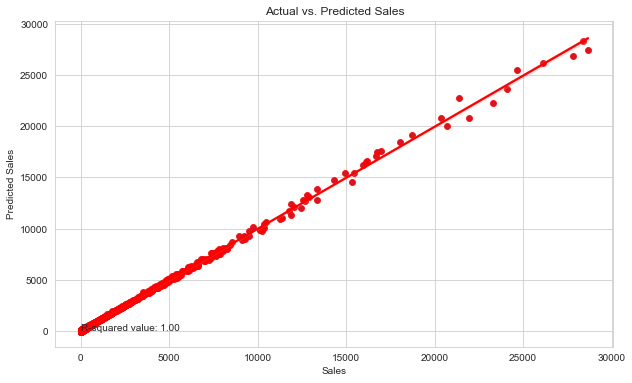

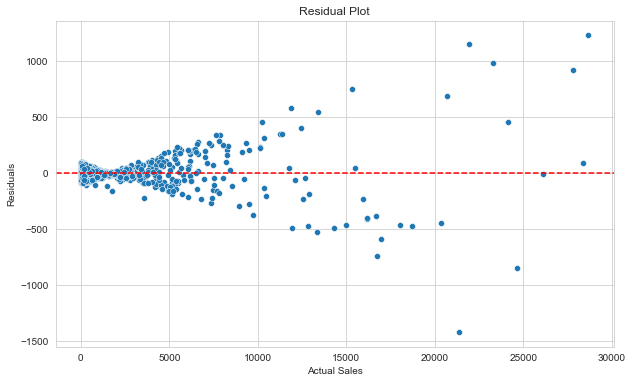

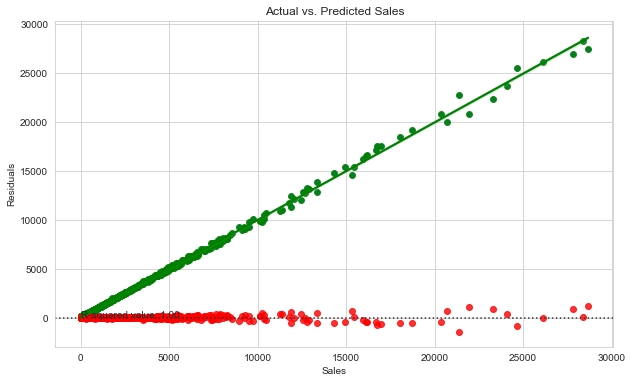

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a scatter plot of predicted vs. actual sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')

# Adding a regression line for reference
sns.regplot(x=y_test, y=y_pred, color='r')
plt.text(2, 18, f'R-squared value: {r2:.2f}')
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# Creating a scatter plot of predicted vs. actual sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')

# Adding a regression line for reference
sns.regplot(x=y_test, y=y_pred, color='green')

# Showing the R-squared value on the plot
plt.text(5, 25, f'R-squared value: {r2:.2f}')

# Calculating and plotting the residuals
residuals = y_test - y_pred
sns.residplot(x=y_test, y=residuals, color='red')
plt.ylabel('Residuals')

plt.show()

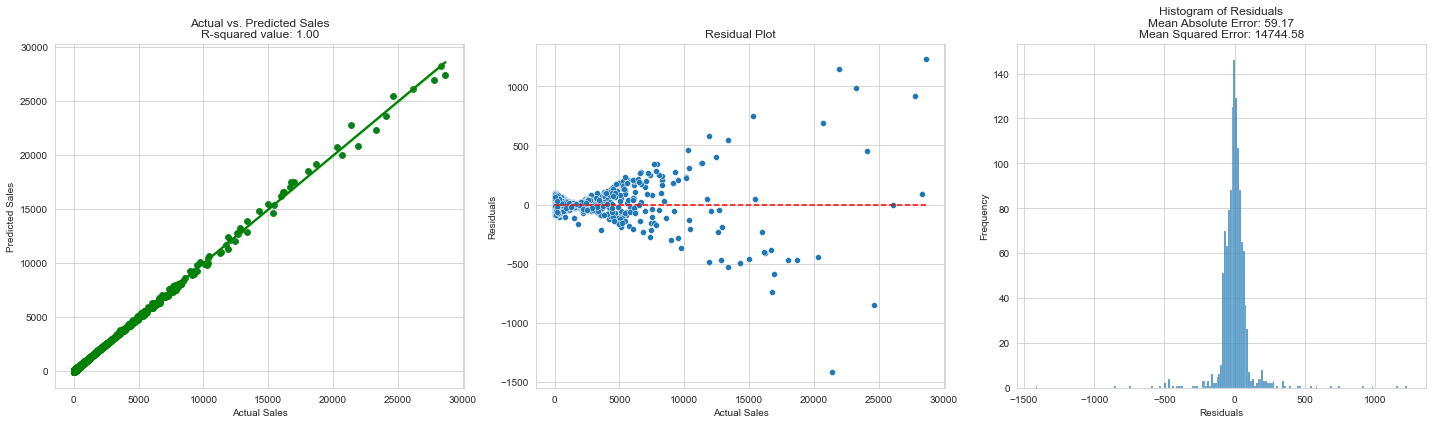

In [133]:
# Creating a scatter plot of predicted vs. actual sales
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# First subplot: Actual vs. Predicted Sales
sns.scatterplot(x=y_test, y=y_pred, ax=axes[0])
sns.regplot(x=y_test, y=y_pred, color='green', ax=axes[0])
axes[0].set_xlabel('Actual Sales')
axes[0].set_ylabel('Predicted Sales')
axes[0].set_title('Actual vs. Predicted Sales\nR-squared value: {:.2f}'.format(r2))

# Second subplot: Residual Plot
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals, ax=axes[1])
sns.lineplot(x=[y_test.min(), y_test.max()], y=[0, 0], color='red', linestyle='--', ax=axes[1])
axes[1].set_xlabel('Actual Sales')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

# Third subplot: Histogram of Residuals
sns.histplot(residuals, ax=axes[2])
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of Residuals\nMean Absolute Error: {:.2f}\nMean Squared Error: {:.2f}'.format(mae, mse))

plt.tight_layout()
plt.show()


In [112]:
# Select relevant columns for clustering
cluster_cols = ['Product Sub-Category_label', 'Sales', 'Profit', 'Total Cost', 'Shipping Cost',
               'Customer Segment_label','Order Priority_label','Product Category_label',
                'Product Sub-Category_label','Product Container_label',
                'Product Base Margin','Order Quantity', 'Unit Price','Discount',
                'Total Cost', 'Shipping Cost', 'Region_label', 'Ship Mode_label', 'State_label']

# Gives K-Means Silhouette Score: 0.5456500119474921

In [113]:
cluster_cols = ['Sales']

#  Product Base Margin - Agglomerative Hierarchical Silhouette Score: 0.70

In [114]:
# Split the data into train, test, validation sets
train_df, test_df = train_test_split(clean_df_walmart, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

In [115]:
# K-Means clustering
kmeans = KMeans(n_clusters=len(clean_df_walmart['Product Category'].unique()), random_state=42).fit(train_df[cluster_cols])
train_df['kmeans_cluster'] = kmeans.predict(train_df[cluster_cols])
val_df['kmeans_cluster'] = kmeans.predict(val_df[cluster_cols])
test_df['kmeans_cluster'] = kmeans.predict(test_df[cluster_cols])

# Agglomerative hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=len(clean_df_walmart['Product Category'].unique())).fit(train_df[cluster_cols])
train_df['agg_cluster'] = agg_clustering.fit_predict(train_df[cluster_cols])
val_df['agg_cluster'] = agg_clustering.fit_predict(val_df[cluster_cols])
test_df['agg_cluster'] = agg_clustering.fit_predict(test_df[cluster_cols])

# Calculate silhouette scores for both models on validation data
kmeans_silhouette = silhouette_score(val_df[cluster_cols], val_df['kmeans_cluster'])
agg_silhouette = silhouette_score(val_df[cluster_cols], val_df['agg_cluster'])
print('K-Means Silhouette Score:', kmeans_silhouette)
print('Agglomerative Hierarchical Silhouette Score:', agg_silhouette)

K-Means Silhouette Score: 0.7789622353908033
Agglomerative Hierarchical Silhouette Score: 0.7620941297363198


In [116]:
label_encoders = dict()
# Iterate over unique label encoder values for Product Sub-Category
for label in clean_df_walmart['Product Category_label'].unique():
    # Get the corresponding Product Category value for this label encoder value
    category = clean_df_walmart.loc[clean_df_walmart['Product Category_label'] == label, 'Product Category'].iloc[0]
    # Add the key-value pair to the dictionary
    label_encoders[label] = category
label_encoders

{1: 'Office Supplies', 0: 'Furniture', 2: 'Technology'}

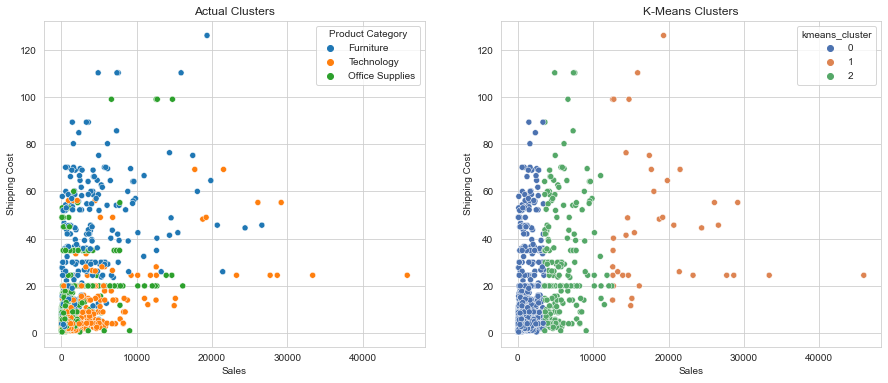

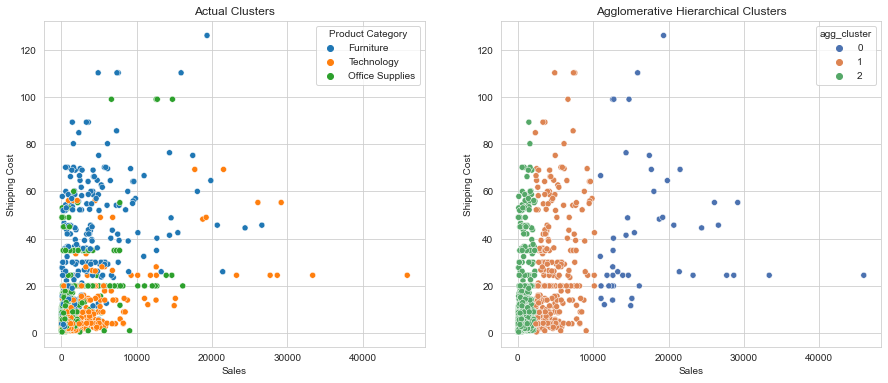

In [117]:
# Plot the clusters
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Sales', y='Shipping Cost', hue='Product Category', data=val_df)
plt.title('Actual Clusters')

plt.subplot(1,2,2)
sns.scatterplot(x='Sales', y='Shipping Cost', hue='kmeans_cluster', data=val_df, palette='deep')
plt.title('K-Means Clusters')
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Sales', y='Shipping Cost', hue='Product Category', data=val_df)
plt.title('Actual Clusters')

plt.subplot(1,2,2)
sns.scatterplot(x='Sales', y='Shipping Cost', hue='agg_cluster', data=val_df, palette='deep')
plt.title('Agglomerative Hierarchical Clusters')
plt.show()

In [118]:
#clean_df_walmart.head().to_csv('out.csv')

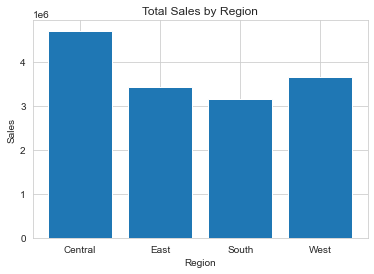

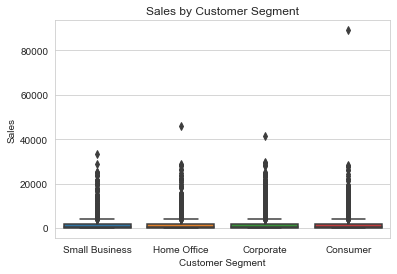

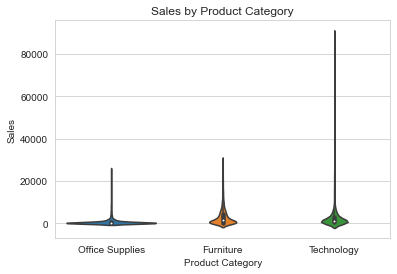

In [119]:
region_sales = clean_df_walmart.groupby('Region')['Sales'].sum().reset_index()
plt.bar(region_sales['Region'], region_sales['Sales'])
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

sns.boxplot(x='Customer Segment', y='Sales', data=clean_df_walmart)
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()

sns.violinplot(x='Product Category', y='Sales', data=clean_df_walmart)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()


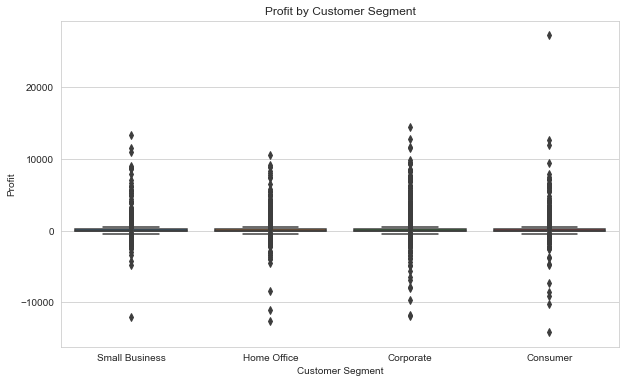

In [120]:
# Boxplot of Profit by Customer Segment
plt.figure(figsize=(10,6))
sns.boxplot(data=clean_df_walmart, x="Customer Segment", y="Profit")
plt.title("Profit by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Profit")
plt.show()


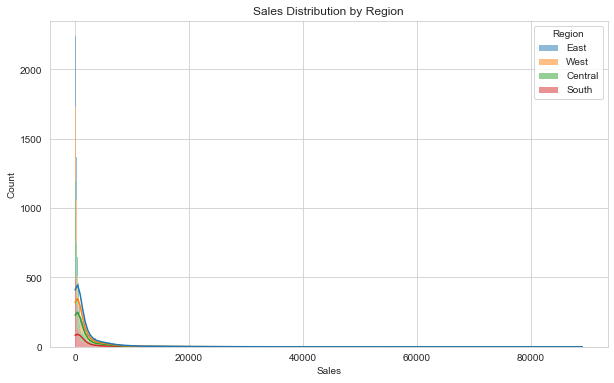

In [121]:
# Set style for seaborn plots
sns.set_style("whitegrid")

# Histogram of Sales by Region
plt.figure(figsize=(10,6))
sns.histplot(data=clean_df_walmart, x="Sales", hue="Region", multiple="stack", kde=True)
plt.title("Sales Distribution by Region")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()




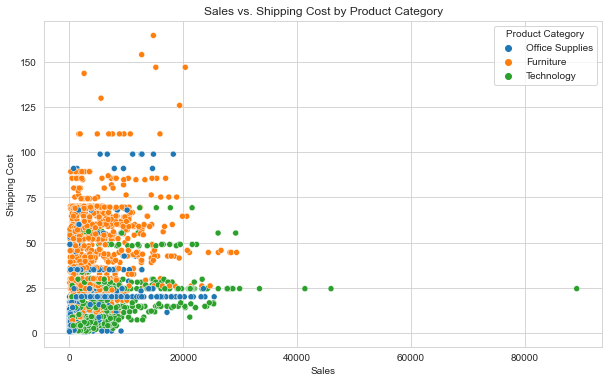

In [122]:

# Scatterplot of Sales vs. Shipping Cost
plt.figure(figsize=(10,6))
sns.scatterplot(data=clean_df_walmart, x="Sales", y="Shipping Cost", hue="Product Category")
plt.title("Sales vs. Shipping Cost by Product Category")
plt.xlabel("Sales")
plt.ylabel("Shipping Cost")
plt.show()



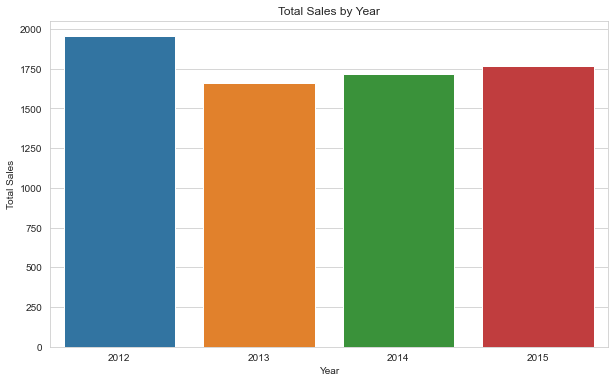

In [123]:
# Bar chart of Total Sales by Year
plt.figure(figsize=(10,6))
sns.barplot(data=clean_df_walmart, x="Year", y="Sales", ci=None)
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()



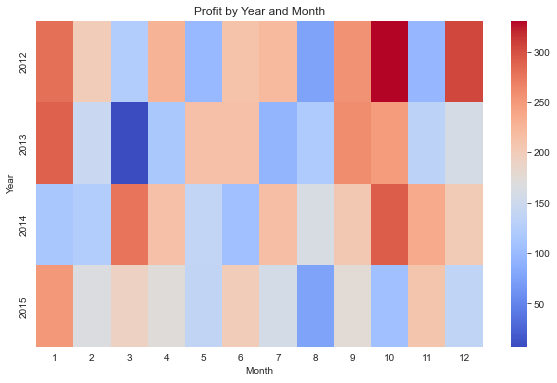

In [124]:
# Heatmap of Profit by Year and Month
plt.figure(figsize=(10,6))
pivot = clean_df_walmart.pivot_table(values="Profit", index="Year", columns="Month")
sns.heatmap(data=pivot, cmap="coolwarm")
plt.title("Profit by Year and Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

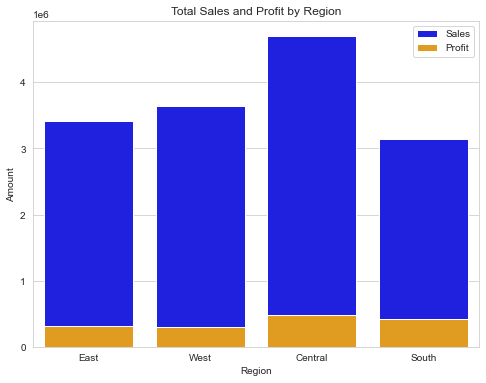

In [125]:
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='Sales', data=clean_df_walmart, estimator=sum, ci=None, color='blue')
sns.barplot(x='Region', y='Profit', data=clean_df_walmart, estimator=sum, ci=None, color='orange')
plt.title('Total Sales and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend(labels=['Sales', 'Profit'])
plt.show()

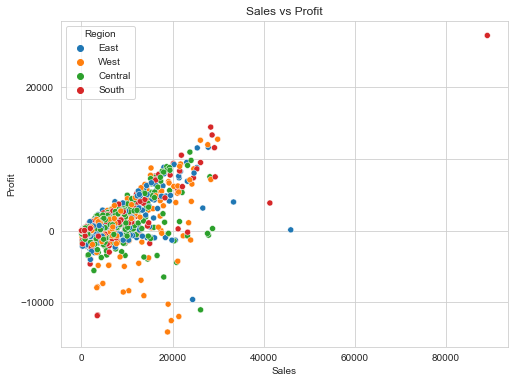

In [126]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Sales', y='Profit', data=clean_df_walmart, hue='Region')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


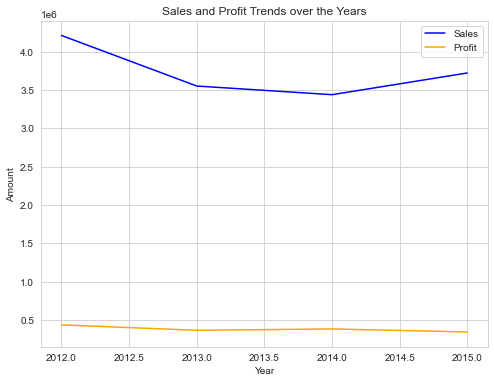

In [127]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='Sales', data=clean_df_walmart, estimator=sum, ci=None, color='blue')
sns.lineplot(x='Year', y='Profit', data=clean_df_walmart, estimator=sum, ci=None, color='orange')
plt.title('Sales and Profit Trends over the Years')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(labels=['Sales', 'Profit'])
plt.show()


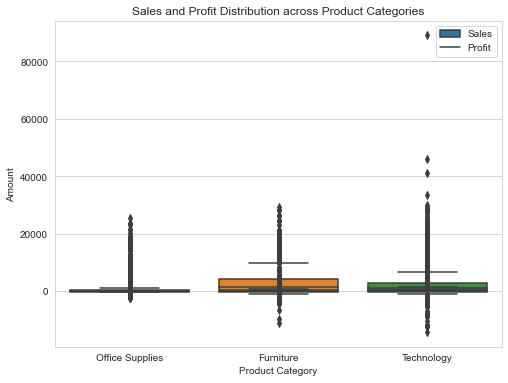

In [128]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Product Category', y='Sales', data=clean_df_walmart)
sns.boxplot(x='Product Category', y='Profit', data=clean_df_walmart)
plt.title('Sales and Profit Distribution across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.legend(labels=['Sales', 'Profit'])
plt.show()


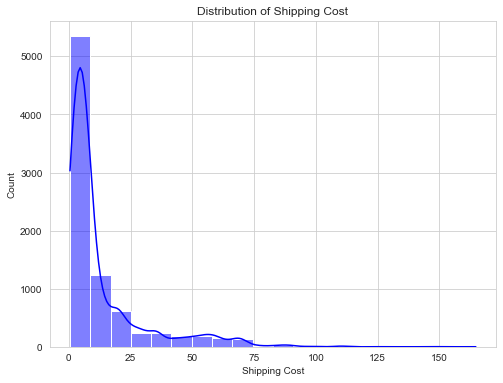

In [129]:
plt.figure(figsize=(8,6))
sns.histplot(x='Shipping Cost', data=clean_df_walmart, bins=20, kde=True, color='blue')
plt.title('Distribution of Shipping Cost')
plt.xlabel('Shipping Cost')
plt.ylabel('Count')
plt.show()
